### Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

# importing libraries to read the training data and visualise the data
import pandas as pd
import numpy as np
import seaborn as sns

# importing for plot the graphs
import matplotlib.pyplot as plt
%matplotlib inline

mydata= pd.read_csv('CE802_P3_Data.csv')

#checking the first 10 rows of data
mydata.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,391.54,-1187.91,454.14,UK,110.23,-185.90,74.82,-349.54,54.43,220.20,...,-98.61,20792.14,2349.78,-728.52,2.48,6.26,5,-2558.91,Very low,314.17
1,-5972.94,3087.03,666.78,Europe,198.78,-301.16,66.93,-371.60,-374.36,116.34,...,-78.75,27071.96,959.86,518.34,3.24,6.24,3,-2210.10,Very low,-1410.42
2,3457.75,255.15,350.10,UK,178.73,-80.16,85.47,-308.88,-225.05,259.08,...,36.15,18956.84,1027.46,-272.04,2.40,-7.60,4,-1967.13,Low,609.09
3,5816.09,3185.46,467.10,USA,186.79,-240.90,74.52,-387.02,-53.64,351.42,...,-47.10,18581.22,2013.38,-2481.69,4.70,8.28,3,-877.20,High,2005.25
4,8521.42,811.47,407.82,Rest,160.67,-148.62,69.15,-365.68,-583.60,297.12,...,-77.55,12522.72,1346.02,-1811.85,1.92,-3.32,6,-1054.29,Medium,1840.37
5,8554.66,2294.55,458.02,UK,196.77,-102.94,62.37,-349.84,-443.44,335.72,...,-42.03,22425.60,2120.78,-557.79,2.80,11.54,2,-1627.86,Very low,73.19
6,8037.51,2569.14,642.70,Europe,200.71,-300.94,53.25,-404.54,-444.35,417.74,...,-243.96,11716.20,1885.52,-874.02,4.37,-0.50,5,-788.79,Very high,2283.98
7,6926.58,1380.03,412.18,UK,110.48,-238.64,64.92,-392.94,-562.36,187.30,...,-45.87,18896.90,1845.32,-238.05,0.75,2.26,3,-351.15,Medium,34.96
8,6800.11,2100.03,322.64,Europe,190.12,-129.76,57.03,-468.86,-177.95,280.16,...,-216.90,13196.48,1124.90,-2855.31,5.03,-3.18,7,-1756.92,Very high,-1558.17
9,4126.04,1164.03,305.32,UK,161.75,-211.18,86.10,-359.68,-376.45,326.70,...,-267.30,16254.78,2114.82,-1994.25,1.25,-6.76,3,-3201.93,Low,87.73


In [2]:
# find missing percentage of data in all of the informative predictor
missing_percentage = mydata.isnull().sum()/len(mydata) * 100
print(missing_percentage)

F1        0.0
F2        0.0
F3        0.0
F4        0.0
F5        0.0
F6        0.0
F7        0.0
F8        0.0
F9        0.0
F10       0.0
F11       0.0
F12       0.0
F13       0.0
F14       0.0
F15       0.0
F16       0.0
F17       0.0
F18       0.0
F19       0.0
F20       0.0
F21       0.0
F22       0.0
F23       0.0
F24       0.0
F25       0.0
F26       0.0
F27       0.0
F28       0.0
F29       0.0
F30       0.0
F31       0.0
F32       0.0
F33       0.0
F34       0.0
F35       0.0
F36       0.0
Target    0.0
dtype: float64


/Users/kanishkgarg/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 49.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kanishkgarg/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kanishkgarg/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kanishkgarg/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


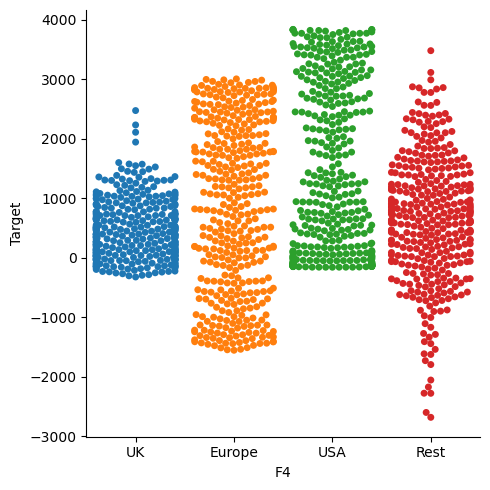

In [3]:
sns.catplot(x='F4',y='Target',kind='swarm', data=mydata)
# This gives us the distribution of our data as well

In [4]:
# making a copy of data to work on
mydata_copy = mydata.copy()

# converting string values of column F4 to dummy numerical data for better model building
mydata_copy = pd.get_dummies(mydata_copy, columns=['F4'],drop_first=True)
# replaced ordered string value to ordered numerical values for better model building.
mydata_copy['F36'].replace(['Very low', 'Low','Medium','High','Very high'],[0,1,2,3,4], inplace= True)

In [5]:
mydata_copy.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,...,F31,F32,F33,F34,F35,F36,Target,F4_Rest,F4_UK,F4_USA
0,391.54,-1187.91,454.14,110.23,-185.90,74.82,-349.54,54.43,220.20,9041.11,...,-728.52,2.48,6.26,5,-2558.91,0,314.17,0,1,0
1,-5972.94,3087.03,666.78,198.78,-301.16,66.93,-371.60,-374.36,116.34,11294.19,...,518.34,3.24,6.24,3,-2210.10,0,-1410.42,0,0,0
2,3457.75,255.15,350.10,178.73,-80.16,85.47,-308.88,-225.05,259.08,14943.90,...,-272.04,2.40,-7.60,4,-1967.13,1,609.09,0,1,0
3,5816.09,3185.46,467.10,186.79,-240.90,74.52,-387.02,-53.64,351.42,7530.42,...,-2481.69,4.70,8.28,3,-877.20,3,2005.25,0,0,1
4,8521.42,811.47,407.82,160.67,-148.62,69.15,-365.68,-583.60,297.12,7682.62,...,-1811.85,1.92,-3.32,6,-1054.29,2,1840.37,1,0,0


Text(0.5, 1.0, 'Correlation Matrix')

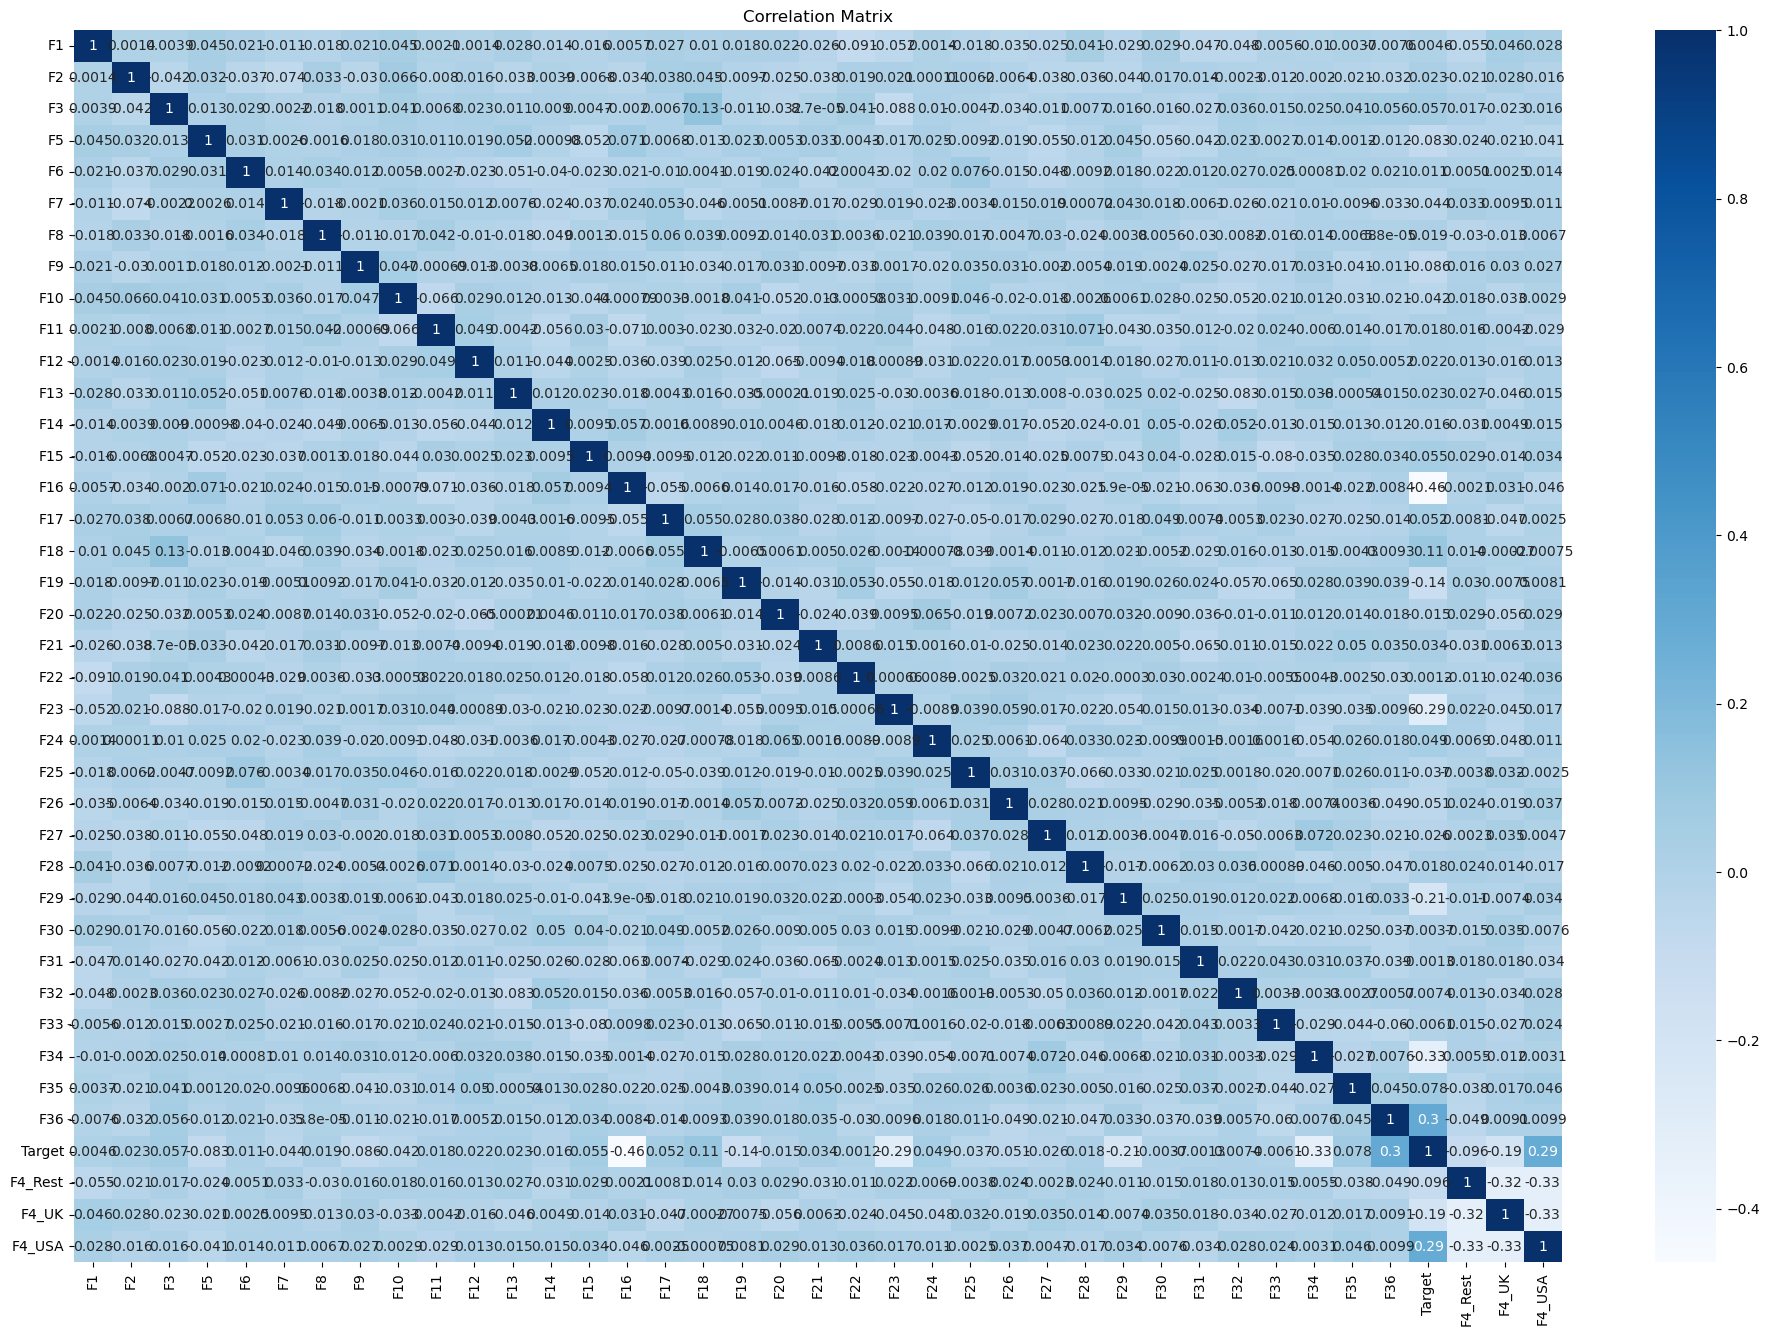

In [6]:
# checking correlation among informative predictors
plt.figure(figsize=(24,16))
sns.heatmap(mydata_copy.corr(), cmap="Blues", annot=True)
plt.title('Correlation Matrix')

In [7]:
# converted the data of column F16 and target into 1D array using numpy
X = mydata_copy.drop("Target",axis=1)
y = mydata_copy["Target"]

# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [8]:
#data scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# building linear regression model
from sklearn.linear_model import LinearRegression

rgr = LinearRegression()
rgr.fit(X_train,y_train)
print(rgr.score(X_test,y_test))

0.6144929254580801


In [10]:
# predict based on the model trained
y_pred = rgr.predict(X_test)

In [11]:
# library for checking the r2_score and MSE value of model we built
from sklearn import metrics
print("Coefficient of determination: %.4f" %metrics.r2_score(y_test, y_pred))
print("Mean Squared error: %.4f" %metrics.mean_squared_error(y_test, y_pred))
print("Mean Coefficient: ", rgr.coef_.mean())


Coefficient of determination: 0.6145
Mean Squared error: 498846.9723
Mean Coefficient:  -38.321679078025085


In [12]:
# running cross validation on the dataset to check whether the model 
# can generalise over the whole dataset or not
from sklearn.model_selection import cross_val_score
score = cross_val_score(rgr, X, y, cv=10)
print(score.mean())

0.6702529596523081


In [13]:
# Random forest Regressor

# importing RF regressor
from sklearn.ensemble import RandomForestRegressor

# defining the regressor model
forest=RandomForestRegressor(n_estimators=20,
                             max_depth=11,
                             criterion='mse',
                            )
# training the model based on the data split
forest.fit(X_train,y_train)

/Users/kanishkgarg/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', max_depth=11, n_estimators=20)

In [14]:
# predict the value using Random forest regressor

y_pred = forest.predict(X_test)

In [15]:
# printing r2_score and MSE for the fitted model

print("Coefficient of determination: %.4f" %metrics.r2_score(y_test, y_pred))
print("Mean Squared error: %.4f" %metrics.mean_squared_error(y_test, y_pred))

Coefficient of determination: 0.6797
Mean Squared error: 414465.5126


In [16]:
score = cross_val_score(forest, X, y, cv=10)
print(score.mean())

/Users/kanishkgarg/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kanishkgarg/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kanishkgarg/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kanishkgarg/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kanishkgarg/o

0.6777999838451597


In [17]:
# Graident Boost regressor model using sklearn

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

gbr_rgr = GradientBoostingRegressor()
gbr_rgr.fit(X_train, y_train)

y_pred = gbr_rgr.predict(X_test)


In [18]:
# printing r2_score and MSE for the fitted model

print("Coefficient of determination: %.4f" %metrics.r2_score(y_test, y_pred))
print("Mean Squared error: %.4f" %metrics.mean_squared_error(y_test, y_pred))

Coefficient of determination: 0.8358
Mean Squared error: 212514.9985


In [19]:
# running cross validation on the dataset to check whether the model 
# can generalise over the whole dataset or not
from sklearn.model_selection import cross_val_score
score = cross_val_score(gbr_rgr, X, y, cv=10)
print(score.mean())

0.8348421707251271


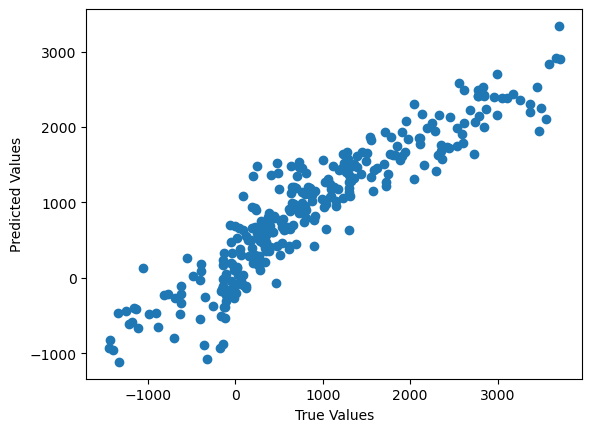

In [20]:
# Scatter plot for y_test vs y_pred values using Graident Boost Regressor

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

### Part B

In [23]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

# converting string values of column F4 to dummy numerical data 
# for better model building
test_data = pd.get_dummies(test_data, columns=['F4'],drop_first=True)

# replaced ordered string value to ordered numerical values
# for better model building.
test_data['F36'].replace(['Very low', 'Low','Medium','High'
                          ,'Very high'],[0,1,2,3,4], inplace= True)


predicted = gbr_rgr.predict(test_data) # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
    
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])

# after making sure only last column was updated, replacing old test file with new updated data
test_df.to_csv('CE802_P3_Test.csv', index=False, float_format='%.8g')

/Users/kanishkgarg/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
